All codes made with the help of chatgpt and github copilot by feeding the question subpart as the prompt

In [1]:
# cell 1: setup
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import clip  # install via: pip install git+https://github.com/openai/CLIP.git

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [2]:
# cell 2: load RN50 ImageNet pretrained model
resnet_imagenet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).to(device)
resnet_imagenet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
# cell 3: load OpenAI CLIP model (RN50 version)
clip_model, clip_preprocess = clip.load("RN50", device=device)
clip_model.eval()

100%|███████████████████████████████████████| 244M/244M [00:27<00:00, 9.32MiB/s]


CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

In [6]:
from PIL import Image
image = Image.open("MountainLion.jpg").convert("RGB")
image.show()  # optional, to verify


In [7]:
# Step 2: Preprocess for both models
from torchvision import transforms
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CLIP and its preprocessing
clip_model, clip_preprocess = clip.load("RN50", device=device)
clip_model.eval()

# ImageNet-style transform
transform_resnet = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

image_clip = clip_preprocess(image).unsqueeze(0).to(device)
image_resnet = transform_resnet(image).unsqueeze(0).to(device)

In [8]:
# Step 3: Load both models
from torchvision import models

resnet_imagenet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).to(device)
resnet_imagenet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
# Step 4: Run inference
import torch.nn.functional as F

# Get ImageNet categories
imagenet_classes = models.ResNet50_Weights.IMAGENET1K_V1.meta["categories"]
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in imagenet_classes]).to(device)

with torch.no_grad():
    # ImageNet RN50
    output_resnet = resnet_imagenet(image_resnet)
    probs_resnet = F.softmax(output_resnet, dim=-1)

    # CLIP RN50
    image_features = clip_model.encode_image(image_clip)
    text_features = clip_model.encode_text(text_inputs)

    # Normalize for cosine similarity
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [10]:
# Step 5: Display predictions
top5_idx = probs_resnet[0].topk(5).indices
top5_clip = similarity[0].topk(5).indices

print("🟦 ImageNet RN50 Top-5 Predictions:")
for i in top5_idx:
    print(f"{imagenet_classes[i]} ({probs_resnet[0, i].item():.4f})")

print("\n🟥 CLIP RN50 Top-5 Predictions:")
for i in top5_clip:
    print(f"{imagenet_classes[i]} ({similarity[0, i].item():.4f})")

🟦 ImageNet RN50 Top-5 Predictions:
cougar (0.9917)
lion (0.0040)
ram (0.0009)
dingo (0.0008)
ibex (0.0008)

🟥 CLIP RN50 Top-5 Predictions:
cougar (0.6489)
dingo (0.0964)
hyena (0.0500)
lion (0.0299)
titi (0.0133)


This finishes the basic inference

Now for the differences in architecture , although both have the same RN50 backbone CLIP has made some modifications to their model notably

Replacing the globalaveragepooling and FC 1000 with an Attention pooling 

Changed the output from a 1000 class score to a 512 dim embedding 

Used layernorm instead of batch norm after projection

there is a also a transformer based text-encoder which is paired with the CLIP's model

3.1.2

Imagenet uses the WordNet hierarchy to organise its labels

Wordnet is a large lexical database of English where nouns,adjectives and adverbs are grouped together into sets of cognitive synonyms called synsets.

Each synset represents a single concept and may contain multiple synonymous words (e.g., dog.n.01 might contain “dog, domestic dog, Canis familiaris”).

ImageNet maps images to these noun synsets from WordNet.

The hierarchy is structured like a semantic tree, where high-level categories (like "animal") branch into finer-grained categories ("dog" → "bulldog" → "English bulldog").

Each of the 1000 ILSVRC categories corresponds to a WordNet synset.

These synsets are organized in a semantic tree structure, not a flat list.

A synset (short for synonym set) is a group of synonymous words that refer to the same concept in WordNet.

Example:

Synset: n02124075 (WordNet ID)

Description: Egyptian cat

Synonyms: ["Egyptian cat", "Egyptian mau"]

Images in ImageNet for this synset would show cats that match that concept.

So, in ImageNet:

A synset acts as a label for a visual class.

It has an associated unique ID, name(s), and a set of images that visually depict that concept.

Yes — this approach introduces some challenges for visual models:

Semantic ≠ Visual Similarity
Synsets are based on semantic meaning, not visual features. Two semantically close synsets (e.g., "Dalmatian" and "Labrador") may look very different, and vice versa.

Overlapping Visual Features
Some synsets may be visually indistinguishable (e.g., "convertible car" vs "sports car"), especially if context is missing.

Fine-grained Categories
Some synsets are too fine-grained — like distinguishing between similar bird species — which may be very hard even for humans.

Single Synset = Diverse Appearances
A single synset might include visually diverse images (different angles, lighting, backgrounds), increasing intra-class variance.

Here are 3 common types:

Pose / Orientation Variance

A “cat” synset might include side views, front views, curled-up poses, and jumping cats.

Models need to generalize over all.

Context / Background Variance

A “lawnmower” might be in a backyard, garage, store, or field.

The object is the same, but surroundings differ a lot.

Lighting / Color Variance

Images might be taken in daylight, nighttime, or artificial lighting.

Same object, but very different pixel distributions.

Others could include scale, occlusion, or partial views — all of which make classification tricky.

3.1.3 Setup Zero Shot CLIP

In [11]:
def zero_shot_clip_inference(image_pil, clip_model, imagenet_classes, device="cuda"):
    import clip
    import torch
    import torch.nn.functional as F

    # Preprocess image
    image_input = clip_preprocess(image_pil).unsqueeze(0).to(device)

    # Create text prompts: "a photo of a {label}"
    prompts = [f"a photo of a {label}" for label in imagenet_classes]
    text_inputs = torch.cat([clip.tokenize(p) for p in prompts]).to(device)

    with torch.no_grad():
        # Encode image and text
        image_features = clip_model.encode_image(image_input)
        text_features = clip_model.encode_text(text_inputs)

        # Normalize features for cosine similarity
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine similarity as logits → probabilities
        similarity = (100.0 * image_features @ text_features.T)
        probs = similarity.softmax(dim=-1)

    return probs[0]  # return 1D tensor of probabilities

In [12]:
# Run zero-shot CLIP
probs_clip = zero_shot_clip_inference(image, clip_model, imagenet_classes, device)

# Print Top-5
top5_indices = probs_clip.topk(5).indices
print("🔮 Zero-Shot CLIP Top-5 Predictions:")
for idx in top5_indices:
    label = imagenet_classes[idx]
    score = probs_clip[idx].item()
    print(f"{label} ({score:.4f})")

🔮 Zero-Shot CLIP Top-5 Predictions:
cougar (0.6489)
dingo (0.0964)
hyena (0.0500)
lion (0.0299)
titi (0.0133)


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🔎 CLIP Top-5 Predictions:
broom: 0.1638
umbrella: 0.1237
sarong: 0.0948
marimba: 0.0584
yurt: 0.0500

🔎 ImageNet ResNet-50 Top-5 Predictions:
umbrella: 0.9015
lampshade: 0.0740
coil: 0.0106
electric fan: 0.0037
yurt: 0.0029


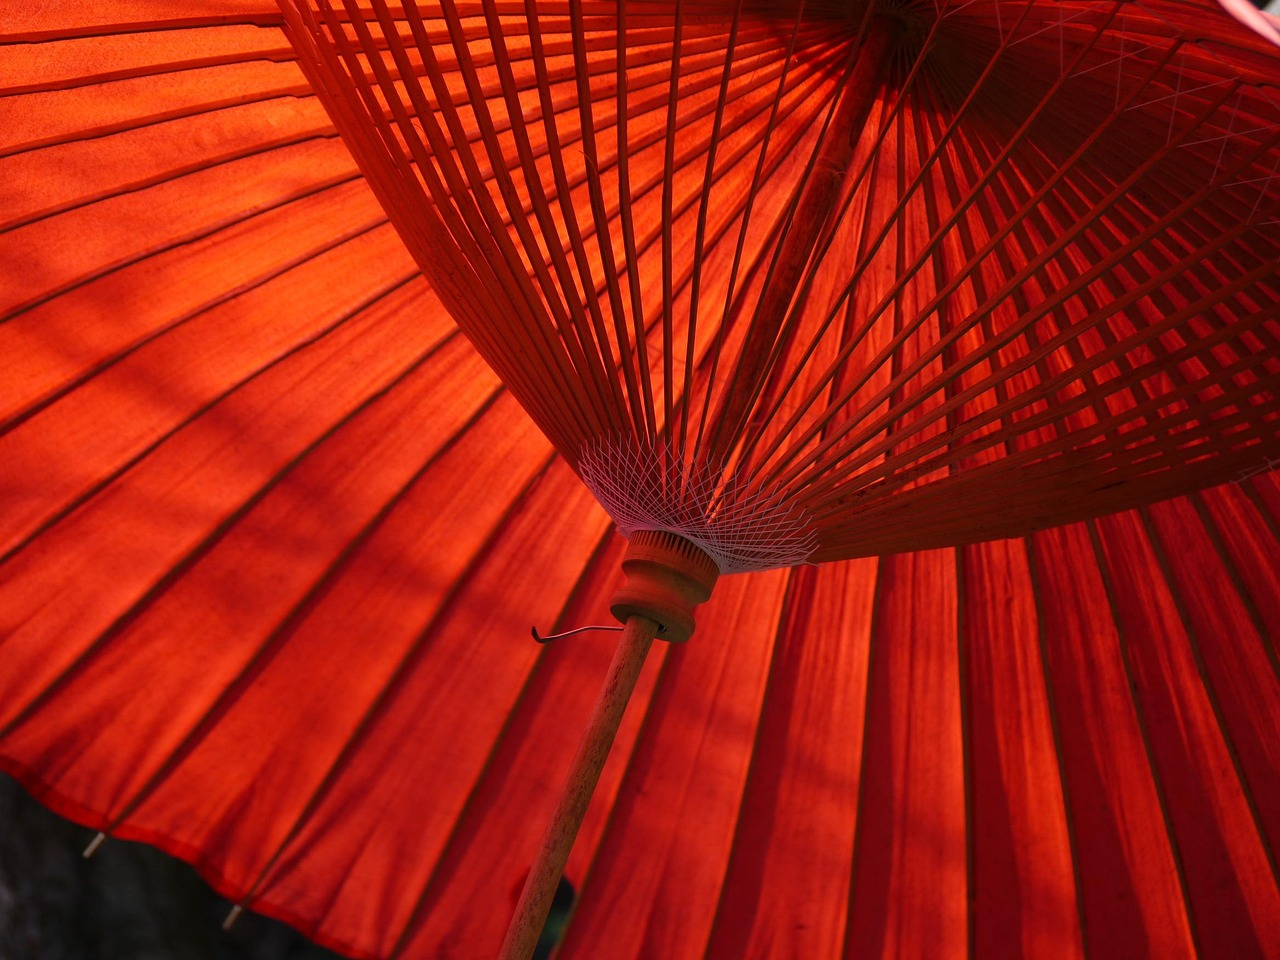

In [5]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import clip
import torchvision.models as models
import torch.nn.functional as F

# Load CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess_clip = clip.load("RN50", device=device)

# Load ImageNet-pretrained ResNet-50
resnet = models.resnet50(pretrained=True).to(device)
resnet.eval()

# ImageNet labels
from urllib.request import urlopen
import json
from IPython.display import display
labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_labels = urlopen(labels_url).read().decode("utf-8").split("\n")

# Transformation for ResNet
preprocess_resnet = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])

def run_clip(image_path):
    image = preprocess_clip(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

    # Use all 1000 ImageNet class names as CLIP prompts
    with torch.no_grad():
        text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in imagenet_labels]).to(device)
        image_features = clip_model.encode_image(image)
        text_features = clip_model.encode_text(text_inputs)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        top5_prob, top5_labels = similarity[0].topk(5)

    print("\n🔎 CLIP Top-5 Predictions:")
    for i in range(5):
        print(f"{imagenet_labels[top5_labels[i]]}: {top5_prob[i].item():.4f}")

def run_resnet(image_path):
    image = preprocess_resnet(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = resnet(image)
        probs = F.softmax(outputs, dim=1)
        top5_prob, top5_indices = probs[0].topk(5)

    print("\n🔎 ImageNet ResNet-50 Top-5 Predictions:")
    for i in range(5):
        print(f"{imagenet_labels[top5_indices[i]]}: {top5_prob[i].item():.4f}")

# Example usage
image_path = "umbrella.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

1 image where imagenet wins


🔎 CLIP Top-5 Predictions:
umbrella: 0.5483
kite: 0.2981
poncho: 0.0237
parachute: 0.0142
ice lolly: 0.0091

🔎 ImageNet ResNet-50 Top-5 Predictions:
bathing cap: 0.2581
umbrella: 0.1979
comic book: 0.0689
shower curtain: 0.0622
balloon: 0.0602


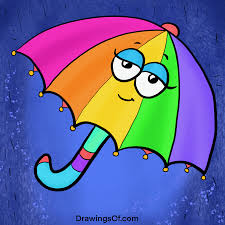

In [6]:
# Example usage
image_path = "umbrella2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

1 image where CLIP wins


🔎 CLIP Top-5 Predictions:
parachute: 0.2749
umbrella: 0.2010
kite: 0.0787
pinwheel: 0.0740
quilt: 0.0390

🔎 ImageNet ResNet-50 Top-5 Predictions:
vestment: 0.4845
handkerchief: 0.1653
umbrella: 0.0536
quilt: 0.0326
apron: 0.0314


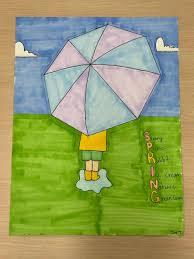

In [7]:
# Example usage
image_path = "umbrella3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

another one where CLIP wins

class-2



🔎 CLIP Top-5 Predictions:
space shuttle: 0.5977
airship: 0.0748
trimaran: 0.0530
sidewinder: 0.0302
missile: 0.0235

🔎 ImageNet ResNet-50 Top-5 Predictions:
space shuttle: 0.9927
airship: 0.0014
projectile: 0.0013
airliner: 0.0010
aircraft carrier: 0.0009


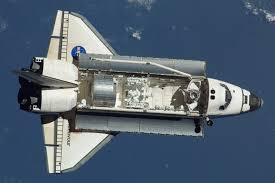

In [8]:
# Example usage
image_path = "shuttle.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

image net wins


🔎 CLIP Top-5 Predictions:
space shuttle: 0.5327
airliner: 0.0955
airship: 0.0496
submarine: 0.0357
school bus: 0.0242

🔎 ImageNet ResNet-50 Top-5 Predictions:
palace: 0.1707
dome: 0.0887
liner: 0.0650
dock: 0.0590
vault: 0.0462


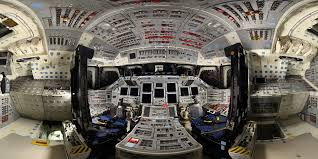

In [9]:
from PIL import Image

# Example usage
image_path = "shuttle2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

1 where clip wins


🔎 CLIP Top-5 Predictions:
space shuttle: 0.8550
airliner: 0.0513
plane: 0.0293
airship: 0.0132
warplane: 0.0108

🔎 ImageNet ResNet-50 Top-5 Predictions:
space shuttle: 0.7231
airliner: 0.2402
airship: 0.0065
killer whale: 0.0046
speedboat: 0.0040


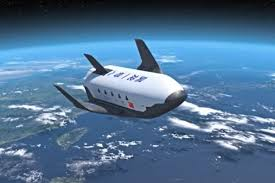

In [11]:
# Example usage
image_path = "shuttle3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins

Class-3



🔎 CLIP Top-5 Predictions:
fireboat: 0.1447
lifeboat: 0.0994
pirate: 0.0934
Pembroke: 0.0421
hook: 0.0328

🔎 ImageNet ResNet-50 Top-5 Predictions:
jigsaw puzzle: 0.1863
maze: 0.1573
envelope: 0.0443
pick: 0.0413
book jacket: 0.0367


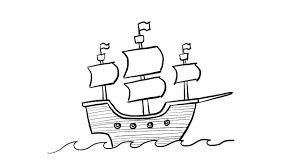

In [12]:
# Example usage
image_path = "pirate.png"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Image net wins


🔎 CLIP Top-5 Predictions:
catamaran: 0.1984
pirate: 0.0952
trimaran: 0.0586
schooner: 0.0373
web site: 0.0314

🔎 ImageNet ResNet-50 Top-5 Predictions:
plate rack: 0.4465
tray: 0.3396
shopping basket: 0.0560
maze: 0.0286
shopping cart: 0.0179


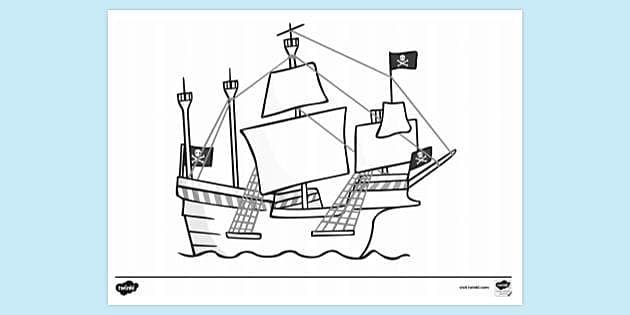

In [21]:
# Example usage
image_path = "pirate2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

clip wins


🔎 CLIP Top-5 Predictions:
schooner: 0.1340
pickelhaube: 0.1240
airship: 0.0852
pirate: 0.0559
lifeboat: 0.0372

🔎 ImageNet ResNet-50 Top-5 Predictions:
puck: 0.2433
jersey: 0.1478
envelope: 0.0775
maze: 0.0354
spider web: 0.0244


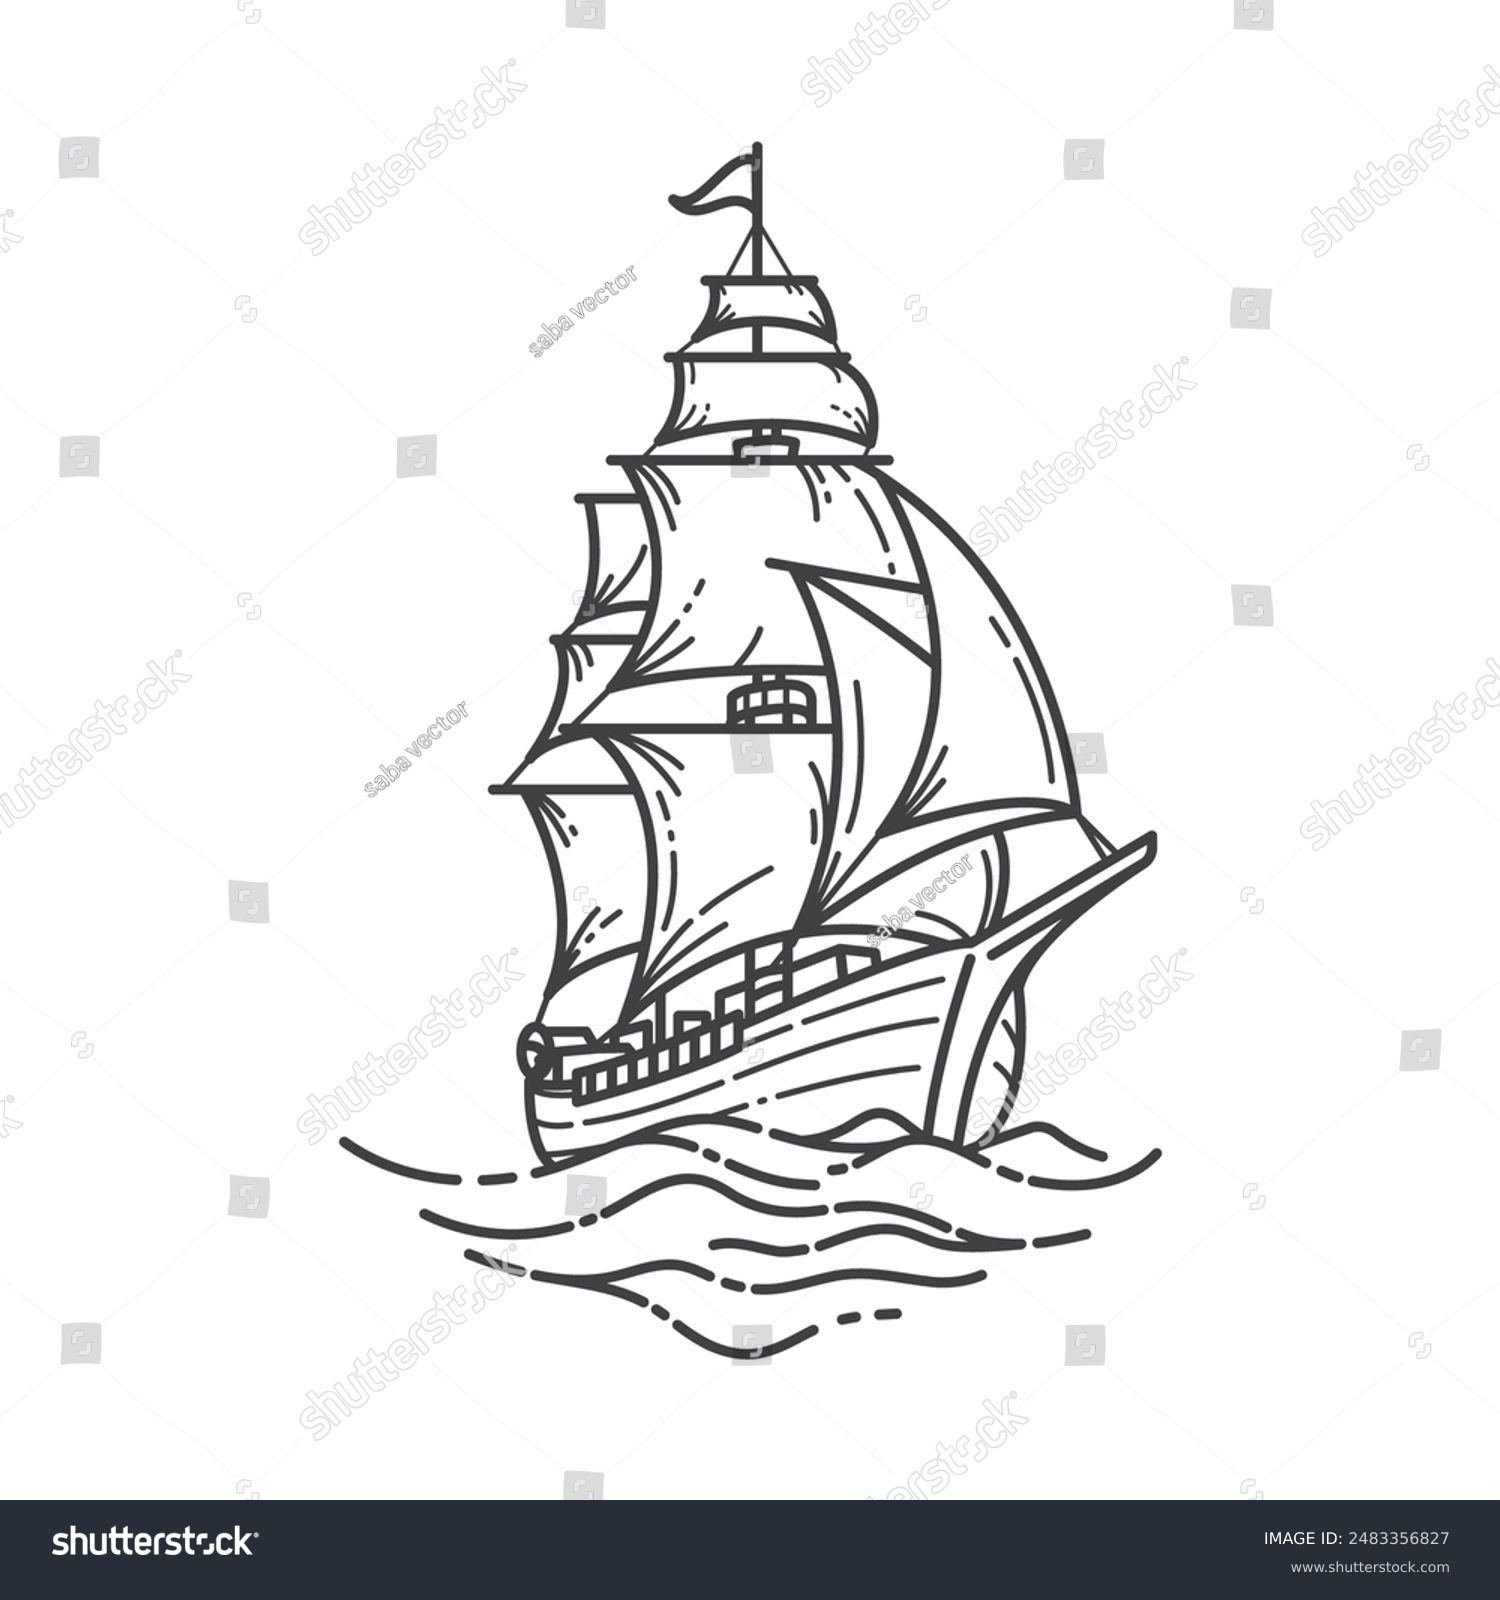

In [23]:
# Example usage
image_path = "pirate3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

clip wins

class-4


🔎 CLIP Top-5 Predictions:
wardrobe: 0.2722
china cabinet: 0.2222
sliding door: 0.1704
bookcase: 0.0971
window shade: 0.0580

🔎 ImageNet ResNet-50 Top-5 Predictions:
shoji: 0.9836
sliding door: 0.0093
window screen: 0.0040
window shade: 0.0022
wardrobe: 0.0001


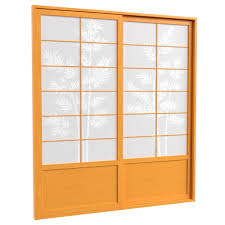

In [26]:
# Example usage
image_path = "shoji.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

imagenet wins


🔎 CLIP Top-5 Predictions:
mobile home: 0.2808
shoji: 0.2477
home theater: 0.1783
recreational vehicle: 0.0792
library: 0.0245

🔎 ImageNet ResNet-50 Top-5 Predictions:
shoji: 0.8484
window shade: 0.0973
studio couch: 0.0070
window screen: 0.0063
prison: 0.0052


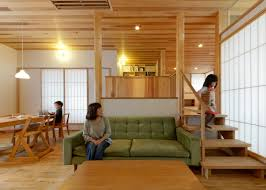

In [37]:
# Example usage
image_path = "shoji2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

I cannot get a single image of shoji whether semantically altered or view-point altered where it beats image net so i will quit here

class-5


🔎 CLIP Top-5 Predictions:
coffee mug: 0.8408
cup: 0.0591
coffeepot: 0.0270
teapot: 0.0081
espresso maker: 0.0068

🔎 ImageNet ResNet-50 Top-5 Predictions:
coffee mug: 0.5993
cup: 0.3270
coffeepot: 0.0208
espresso: 0.0199
whiskey jug: 0.0063


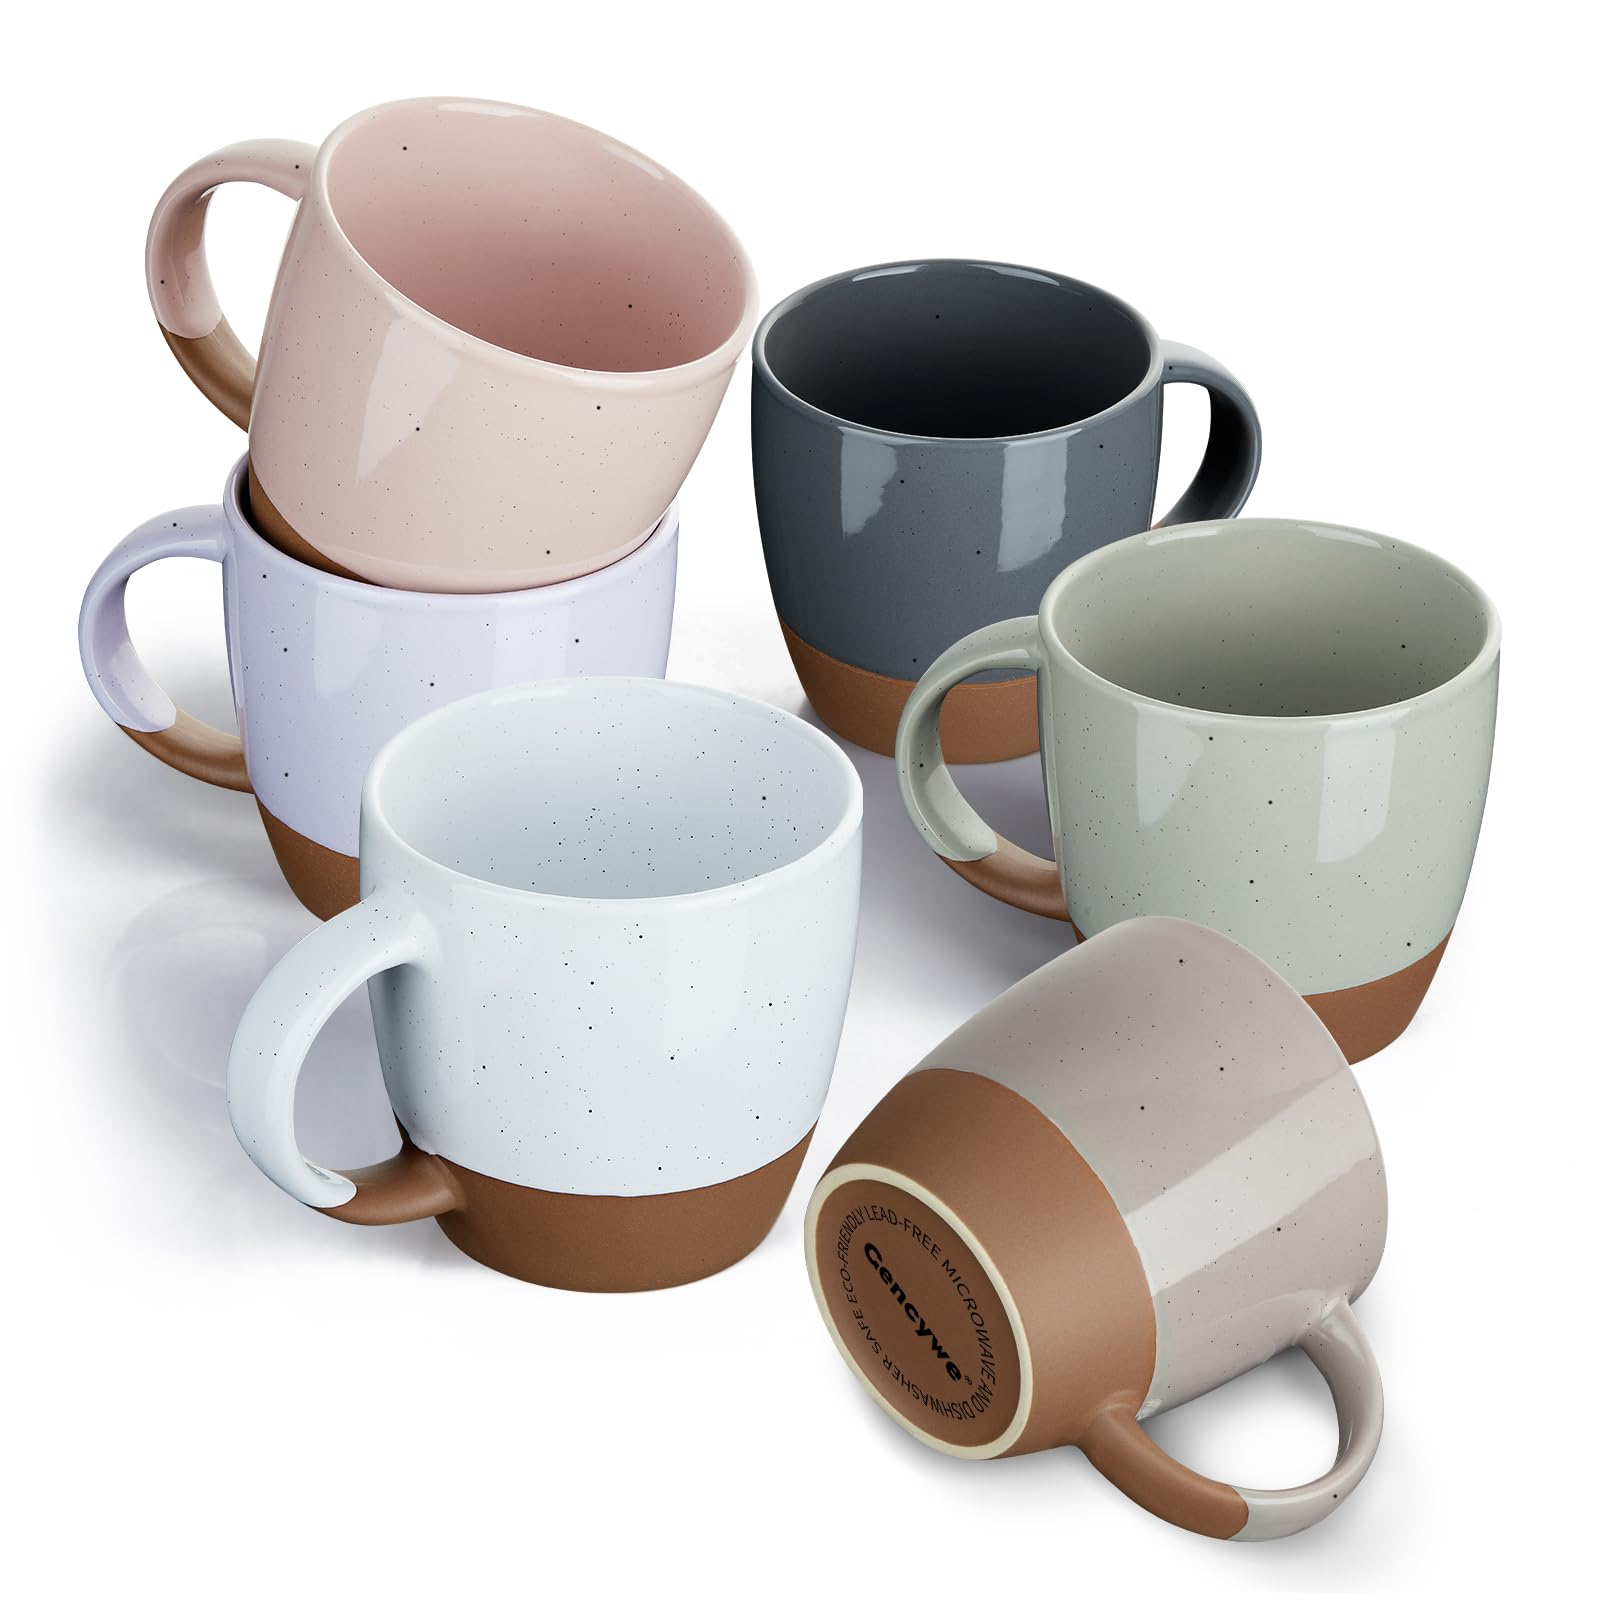

In [38]:
# Example usage
image_path = "coffee.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

clip wins


🔎 CLIP Top-5 Predictions:
coffee mug: 0.3660
coffeepot: 0.1001
teapot: 0.0607
cup: 0.0511
Australian terrier: 0.0330

🔎 ImageNet ResNet-50 Top-5 Predictions:
coffee mug: 0.9381
cup: 0.0551
water jug: 0.0016
whiskey jug: 0.0012
coffeepot: 0.0010


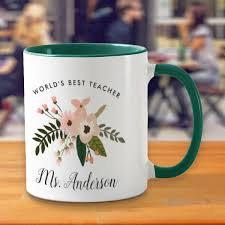

In [39]:
# Example usage
image_path = "coffee2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

imagenet wins


🔎 CLIP Top-5 Predictions:
coffee mug: 0.3408
espresso: 0.1824
cup: 0.1141
coffeepot: 0.0976
espresso maker: 0.0468

🔎 ImageNet ResNet-50 Top-5 Predictions:
coffee mug: 0.2261
cup: 0.1585
pretzel: 0.0654
pitcher: 0.0445
espresso: 0.0405


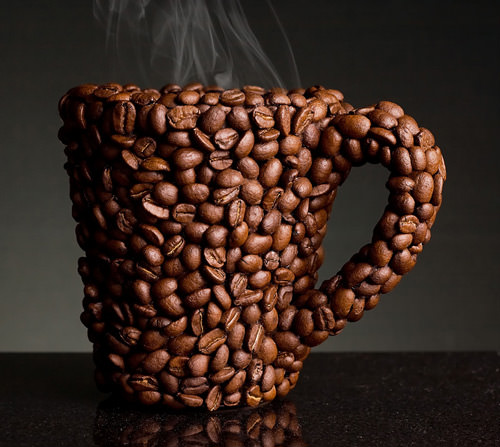

In [40]:
# Example usage
image_path = "coffee3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins

Class-6


🔎 CLIP Top-5 Predictions:
Walker hound: 0.3516
English foxhound: 0.2961
Labrador retriever: 0.1215
Rhodesian ridgeback: 0.0671
Saluki: 0.0359

🔎 ImageNet ResNet-50 Top-5 Predictions:
Labrador retriever: 0.7101
golden retriever: 0.1521
dingo: 0.0324
bloodhound: 0.0104
kelpie: 0.0090


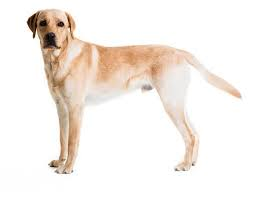

In [42]:
# Example usage
image_path = "Labrador.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Image net wins


🔎 CLIP Top-5 Predictions:
Labrador retriever: 0.3596
lab coat: 0.1753
Lakeland terrier: 0.0487
patas: 0.0340
horizontal bar: 0.0148

🔎 ImageNet ResNet-50 Top-5 Predictions:
web site: 0.9580
book jacket: 0.0089
menu: 0.0075
comic book: 0.0065
crossword puzzle: 0.0025


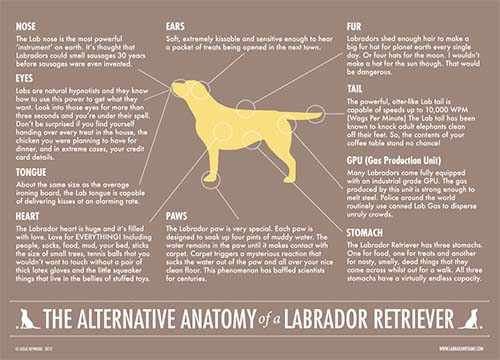

In [47]:
# Example usage
image_path = "Labrador2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)


🔎 CLIP Top-5 Predictions:
Labrador retriever: 0.2637
golden retriever: 0.1550
Weimaraner: 0.0732
toy terrier: 0.0287
basenji: 0.0278

🔎 ImageNet ResNet-50 Top-5 Predictions:
comic book: 0.6742
web site: 0.1746
book jacket: 0.0297
wall clock: 0.0134
analog clock: 0.0106


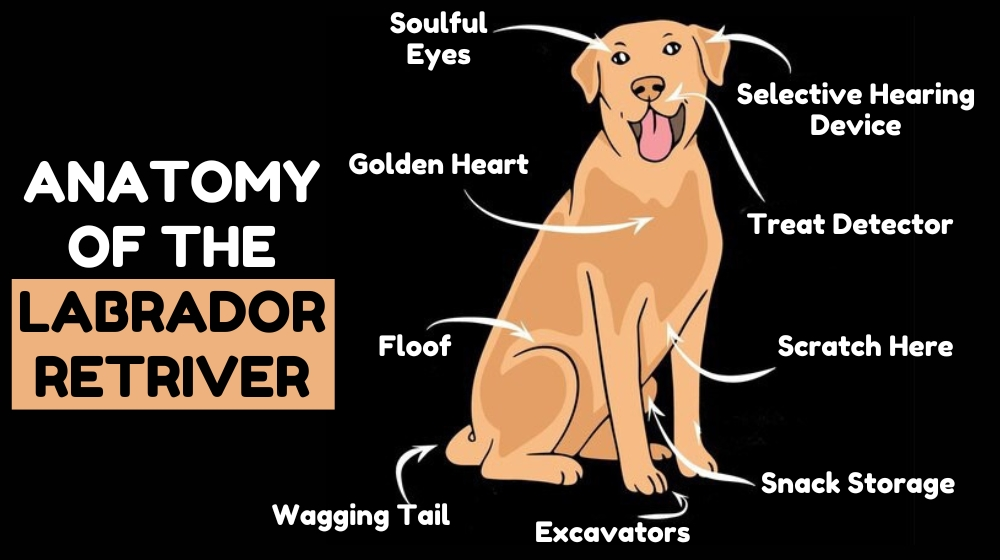

In [48]:
# Example usage
image_path = "Labrador3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

2 for CLIP wins

Class-7



🔎 CLIP Top-5 Predictions:
golf ball: 0.5088
ping-pong ball: 0.0627
baseball: 0.0431
strainer: 0.0261
croquet ball: 0.0253

🔎 ImageNet ResNet-50 Top-5 Predictions:
strainer: 0.2535
microphone: 0.1573
oil filter: 0.1194
golf ball: 0.0840
reel: 0.0205


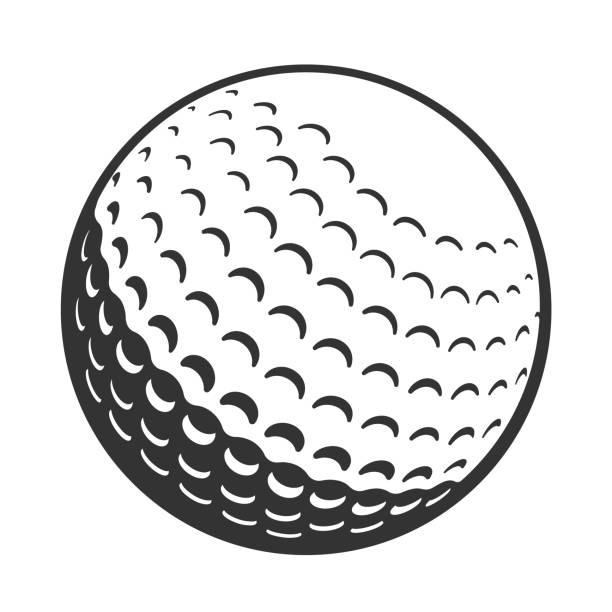

In [50]:
# Example usage
image_path = "Golf.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins


🔎 CLIP Top-5 Predictions:
golf ball: 0.8105
croquet ball: 0.1168
ping-pong ball: 0.0226
ballplayer: 0.0197
golfcart: 0.0026

🔎 ImageNet ResNet-50 Top-5 Predictions:
golf ball: 0.9992
croquet ball: 0.0006
baseball: 0.0002
ping-pong ball: 0.0000
tennis ball: 0.0000


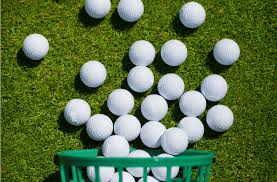

In [51]:
# Example usage
image_path = "Golf2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Image net wins


🔎 CLIP Top-5 Predictions:
golf ball: 0.4067
ping-pong ball: 0.1221
croquet ball: 0.1147
strainer: 0.0309
Petri dish: 0.0206

🔎 ImageNet ResNet-50 Top-5 Predictions:
maraca: 0.0657
golf ball: 0.0609
table lamp: 0.0587
ocarina: 0.0489
face powder: 0.0437


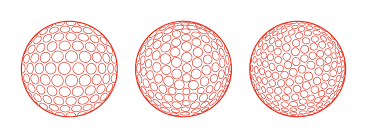

In [53]:
# Example usage
image_path = "Golf3.png"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins

CLass-8


🔎 CLIP Top-5 Predictions:
bow tie: 0.9717
bow: 0.0167
brassiere: 0.0014
handkerchief: 0.0014
velvet: 0.0011

🔎 ImageNet ResNet-50 Top-5 Predictions:
bow tie: 1.0000
hair slide: 0.0000
Windsor tie: 0.0000
knot: 0.0000
earthstar: 0.0000


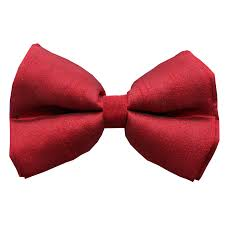

In [55]:
# Example usage
image_path = "Bow.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Imagenet gets 100% confidence?


🔎 CLIP Top-5 Predictions:
bow tie: 0.9287
bow: 0.0396
brassiere: 0.0050
hair slide: 0.0029
knot: 0.0016

🔎 ImageNet ResNet-50 Top-5 Predictions:
necklace: 0.3788
envelope: 0.0651
pick: 0.0487
chain: 0.0466
hair slide: 0.0388


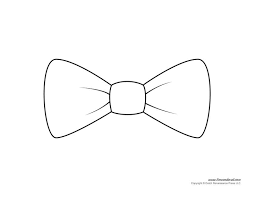

In [56]:
# Example usage
image_path = "Bow2.png"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins


🔎 CLIP Top-5 Predictions:
bow tie: 0.6880
bow: 0.0565
brassiere: 0.0181
mortarboard: 0.0167
knot: 0.0124

🔎 ImageNet ResNet-50 Top-5 Predictions:
jersey: 0.6357
envelope: 0.0972
mortarboard: 0.0417
whistle: 0.0163
academic gown: 0.0158


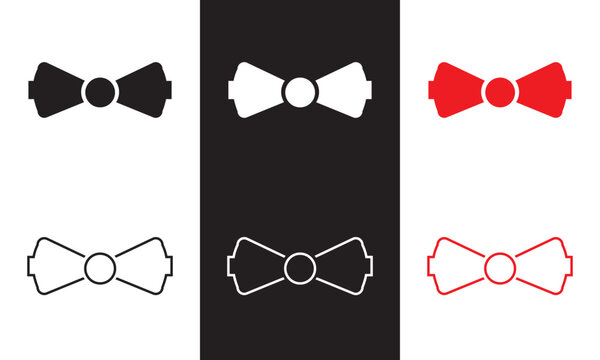

In [58]:
# Example usage
image_path = "Bow3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins

Class-9


🔎 CLIP Top-5 Predictions:
hook: 0.1560
gong: 0.0714
necklace: 0.0611
safety pin: 0.0574
breastplate: 0.0556

🔎 ImageNet ResNet-50 Top-5 Predictions:
hook: 0.3778
whistle: 0.0678
gong: 0.0520
bow: 0.0417
French horn: 0.0283


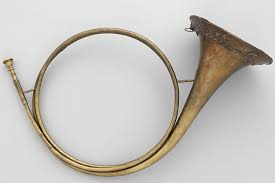

In [60]:
# Example usage
image_path = "French.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Clip wins


🔎 CLIP Top-5 Predictions:
planetarium: 0.2352
radio telescope: 0.0776
solar dish: 0.0478
gong: 0.0435
trombone: 0.0344

🔎 ImageNet ResNet-50 Top-5 Predictions:
cornet: 0.7772
French horn: 0.1514
trombone: 0.0458
sax: 0.0163
buckle: 0.0012


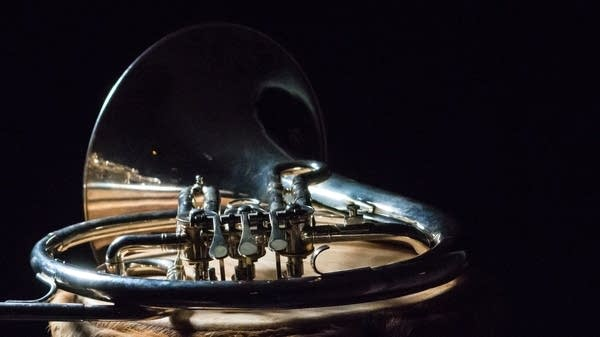

In [61]:
# Example usage
image_path = "French2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Image net wins


🔎 CLIP Top-5 Predictions:
French horn: 0.5571
trombone: 0.1366
cornet: 0.0410
oboe: 0.0249
hook: 0.0223

🔎 ImageNet ResNet-50 Top-5 Predictions:
safety pin: 0.4647
French horn: 0.1947
envelope: 0.0543
hook: 0.0461
cornet: 0.0282


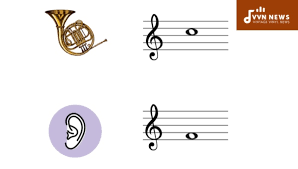

In [67]:
# Example usage
image_path = "French3.png"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Clip wins

Class-10


🔎 CLIP Top-5 Predictions:
banana: 0.8154
hook: 0.0157
redbone: 0.0126
cucumber: 0.0049
bikini: 0.0049

🔎 ImageNet ResNet-50 Top-5 Predictions:
banana: 0.9994
flatworm: 0.0002
nipple: 0.0001
hook: 0.0000
slug: 0.0000


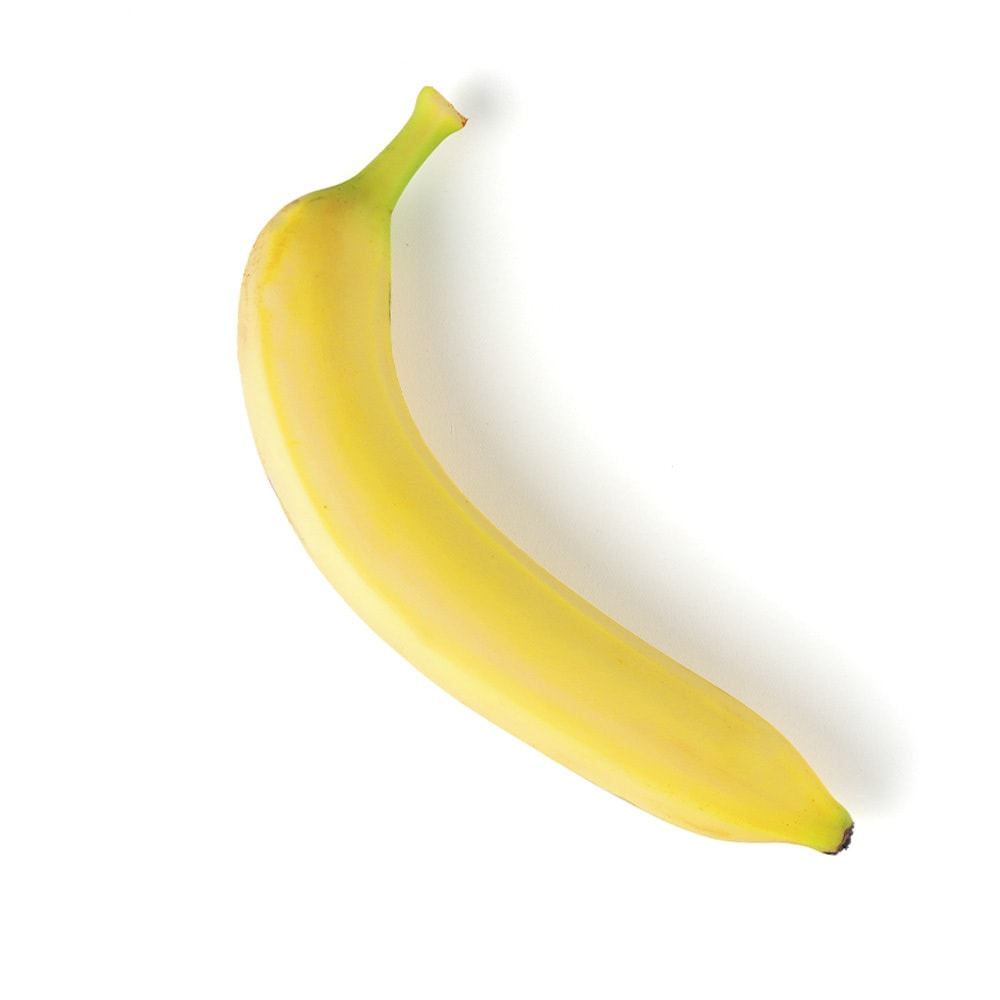

In [68]:
# Example usage
image_path = "Banana.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

Imagenet wins


🔎 CLIP Top-5 Predictions:
banana: 0.6011
isopod: 0.1012
corn: 0.0442
chiton: 0.0329
shoji: 0.0119

🔎 ImageNet ResNet-50 Top-5 Predictions:
banana: 0.4330
eggnog: 0.1752
French loaf: 0.0616
slug: 0.0328
plate: 0.0296


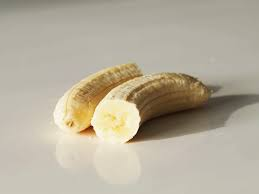

In [70]:
# Example usage
image_path = "Banana2.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins


🔎 CLIP Top-5 Predictions:
banana: 0.8970
fig: 0.0211
ice lolly: 0.0078
cucumber: 0.0070
cabbage butterfly: 0.0055

🔎 ImageNet ResNet-50 Top-5 Predictions:
banana: 0.3062
fig: 0.1830
lemon: 0.1748
eggnog: 0.1601
spaghetti squash: 0.0313


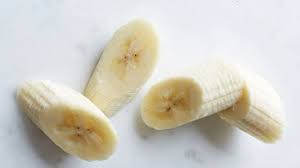

In [71]:
# Example usage
image_path = "Banana3.jpg"  # <- Replace with your image path
run_clip(image_path)
run_resnet(image_path)
# Display the image

# Display the image
image = Image.open(image_path).convert("RGB")
display(image)

CLIP wins

With this we conclude this section , i picked 10 random classes and then chose well centred properly oriented stock images such that imagenet works (simple)

now to make CLIP do better than imagenet i chose obscured images with varying viewpoints , and images which semantically share the same meaning but are different from stock images (like picture of an image) ,

 One biggest example is the space-shuttle , just by throwing the interior of the space-shuttle on the model causes imagenet to misclassify while CLIP somehow understands that this image is semantically the same as the external viewpoint of a space shuttle,

 Same with the banana example too , imagenet understands what the stock centred banana is but when i peel it it starts to lose confidence while CLIP still semantically understands that its a banana and gives it a higher confidence score

Now to move on to 1.5

In [73]:
import torch
import clip
from time import time

# Load the model in FP32 (default)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("RN50", device)

# Convert model to FP16
model = model.half()

# Test image (example, replace with your image)
from PIL import Image
img = Image.open('shuttle2.jpg')  # Replace with actual path to image

# Preprocess image
img_input = preprocess(img).unsqueeze(0).to(device)

# Time the inference with FP16 model
start_time = time()
with torch.no_grad():
    _ = model.encode_image(img_input)
end_time = time()

# Calculate time taken for inference
fp16_time = end_time - start_time
print(f"FP16 Inference Time: {fp16_time:.4f} seconds")

# Convert model back to FP32 for comparison
model_fp32 = model.float()

# Time the inference with FP32 model
start_time = time()
with torch.no_grad():
    _ = model_fp32.encode_image(img_input)
end_time = time()

# Calculate time taken for inference
fp32_time = end_time - start_time
print(f"FP32 Inference Time: {fp32_time:.4f} seconds")

# Compute the difference
time_diff = fp32_time - fp16_time
print(f"Time Difference (FP32 - FP16): {time_diff:.4f} seconds")

FP16 Inference Time: 0.0338 seconds
FP32 Inference Time: 0.1281 seconds
Time Difference (FP32 - FP16): 0.0943 seconds


In [78]:
import time
import torch
import clip
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess_clip = clip.load("RN50", device=device)

# Load CIFAR-10 dataset with 100 images
cifar10_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=preprocess_clip)

# Limit to 100 images
cifar10_data = torch.utils.data.Subset(cifar10_data, range(100))

# DataLoader for 100 images
image_loader = DataLoader(cifar10_data, batch_size=1, shuffle=True)

# Helper function to measure time for 100 runs
def measure_inference_time(model, loader, num_runs=100):
    model.eval()  # Ensure the model is in evaluation mode
    times = []
    
    with torch.no_grad():
        for i, (img, _) in enumerate(loader):
            if i >= num_runs:
                break
            img = img.to(device)

            # Start timer
            start_time = time.time()
            img = img.half()  # Ensure the image is in FP16
            _ = model.encode_image(img)  # Perform inference
            end_time = time.time()

            times.append(end_time - start_time)

    mean_time = torch.tensor(times).mean().item()
    std_time = torch.tensor(times).std().item()

    return mean_time, std_time

# Run inference for FP16
mean_fp16_time, std_fp16_time = measure_inference_time(clip_model, image_loader)
print(f"FP16 Mean Time: {mean_fp16_time}s ± {std_fp16_time}s")

# Convert the model to FP32 for comparison
clip_model = clip_model.float()  # Use float precision (FP32) for the model

# Run inference for FP32
mean_fp32_time, std_fp32_time = measure_inference_time(clip_model, image_loader)
print(f"FP32 Mean Time: {mean_fp32_time}s ± {std_fp32_time}s")

Files already downloaded and verified
FP16 Mean Time: 0.005859966389834881s ± 0.0020152106881141663s
FP32 Mean Time: 0.005341098178178072s ± 0.0011465821880847216s


this difference feels low because of the 100 images being very small 32x32 while the one i ran was higher resolution which fleshed out the time difference

In [91]:
import torch
import clip
import numpy as np
from PIL import Image
import time

# List of image paths
image_paths = [
    'Banana.jpg',
    'shuttle.jpg',
    'umbrella.jpg',
    'Labrador.jpg',
    'French.jpg'
]

# Load model in FP32
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the original model in FP32 (default)
model_fp32, preprocess = clip.load("RN50", device)

# Create a copy of the model and convert to FP16
model_fp16, _ = clip.load("RN50", device)
model_fp16.visual = model_fp16.visual.half()

# Process each image
for img_path in image_paths:
    print(f"\n--- Processing {img_path} ---")
    try:
        # Load and preprocess the image
        image = Image.open(img_path)
        image_input = preprocess(image).unsqueeze(0).to(device)
        
        with torch.no_grad():
            # FP32 inference
            start_time = time.time()
            image_features_fp32 = model_fp32.encode_image(image_input)
            end_time = time.time()
            fp32_time = end_time - start_time
            
            # Normalize features
            image_features_fp32 /= image_features_fp32.norm(dim=-1, keepdim=True)
            
            # FP16 inference
            image_input_fp16 = image_input.half()
            start_time = time.time()
            # Use visual module directly for fp16
            image_features_fp16_raw = model_fp16.visual(image_input_fp16)
            end_time = time.time()
            fp16_time = end_time - start_time
            
            # Convert back to float32 for comparison
            image_features_fp16 = image_features_fp16_raw.float()
            image_features_fp16 /= image_features_fp16.norm(dim=-1, keepdim=True)
        
        # Calculate differences between feature vectors
        feature_diff = torch.abs(image_features_fp32 - image_features_fp16)
        max_diff = torch.max(feature_diff).item()
        mean_diff = torch.mean(feature_diff).item()
        
        print(f"\nImage: {img_path}")
        print(f"FP32 encoding time: {fp32_time:.6f} seconds")
        print(f"FP16 encoding time: {fp16_time:.6f} seconds")
        print(f"Speed improvement: {(fp32_time - fp16_time) / fp32_time:.2%}")
        print(f"Max feature difference: {max_diff:.6f}")
        print(f"Mean feature difference: {mean_diff:.6f}")
        
        # Output the first few values of each feature vector for comparison
        print("\nFirst 5 values of feature vectors:")
        print(f"FP32: {image_features_fp32[0, :5].cpu().numpy()}")
        print(f"FP16: {image_features_fp16[0, :5].cpu().numpy()}")
        
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Memory usage analysis
def print_gpu_memory_usage():
    if device == "cuda":
        # Get current GPU memory in MB
        allocated_memory = torch.cuda.memory_allocated() / 1024**2
        reserved_memory = torch.cuda.memory_reserved() / 1024**2
        print(f"GPU Memory Allocated: {allocated_memory:.2f} MB")
        print(f"GPU Memory Reserved: {reserved_memory:.2f} MB")
    else:
        print("Not using CUDA, memory profiling unavailable")

# Compare memory usage between FP32 and FP16
print("\n--- Memory Usage Analysis ---")

# Clear cache before measurements
if device == "cuda":
    torch.cuda.empty_cache()

# Load a sample image for processing
sample_img = Image.open(image_paths[0])
sample_input = preprocess(sample_img).unsqueeze(0).to(device)

print("\nFP32 Model Memory Usage:")
# Force load into memory and perform a forward pass
with torch.no_grad():
    _ = model_fp32.encode_image(sample_input)
print_gpu_memory_usage()

# Clear cache before FP16 measurement
if device == "cuda":
    torch.cuda.empty_cache()

print("\nFP16 Model Memory Usage:")
sample_input_fp16 = sample_input.half()
with torch.no_grad():
    _ = model_fp16.visual(sample_input_fp16)
print_gpu_memory_usage()



Using device: cuda

--- Processing Banana.jpg ---

Image: Banana.jpg
FP32 encoding time: 0.004985 seconds
FP16 encoding time: 0.005075 seconds
Speed improvement: -1.81%
Max feature difference: 0.002535
Mean feature difference: 0.000202

First 5 values of feature vectors:
FP32: [-0.01677   0.010605 -0.02518  -0.0006    0.0184  ]
FP16: [-0.01662122  0.01086926 -0.02529258 -0.00060209  0.01783708]

--- Processing shuttle.jpg ---

Image: shuttle.jpg
FP32 encoding time: 0.004004 seconds
FP16 encoding time: 0.005030 seconds
Speed improvement: -25.61%
Max feature difference: 0.001892
Mean feature difference: 0.000172

First 5 values of feature vectors:
FP32: [0.0039    0.02951   0.01027   0.0007606 0.01532  ]
FP16: [0.00398015 0.0292818  0.01013678 0.00077336 0.01528578]

--- Processing umbrella.jpg ---

Image: umbrella.jpg
FP32 encoding time: 0.003985 seconds
FP16 encoding time: 0.006002 seconds
Speed improvement: -50.62%
Max feature difference: 0.000925
Mean feature difference: 0.000093

Fi

In [88]:
import torch
import clip
from PIL import Image
import numpy as np

# List of image paths
image_paths = [
    'Banana.jpg',
    'shuttle.jpg',
    'umbrella.jpg',
    'Labrador.jpg',
    'French.jpg'
]

# List of classes (these should match your categories)
categories = ["banana", "space shuttle", "umbrella", "Labrador retriever", "French bulldog"]

# Load model in FP32
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Create the tokenized text inputs once
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

# APPROACH 1: FP32 MODEL
# Load the original FP32 model
model_fp32, preprocess = clip.load("RN50", device)

# Process each image with FP32 model
print("\n--- FP32 MODEL RESULTS ---")
fp32_results = {}

for img_path in image_paths:
    print(f"\nProcessing {img_path} with FP32 model:")
    try:
        # Load and preprocess the image
        image = Image.open(img_path)
        image_input = preprocess(image).unsqueeze(0).to(device)
        
        # Get probabilities
        with torch.no_grad():
            logits_per_image, _ = model_fp32(image_input, text_inputs)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()[0]
        
        # Save results
        fp32_results[img_path] = probs
        
        # Print probabilities
        for category, prob in zip(categories, probs):
            print(f"{category}: {prob*100:.4f}%")
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# APPROACH 2: FP16 MODEL 
# Load a new model and convert everything to half precision
model_fp16, _ = clip.load("RN50", device)
model_fp16 = model_fp16.half()

# Process each image with FP16 model
print("\n--- FP16 MODEL RESULTS ---")
fp16_results = {}

for img_path in image_paths:
    print(f"\nProcessing {img_path} with FP16 model:")
    try:
        # Load and preprocess the image
        image = Image.open(img_path)
        image_input = preprocess(image).unsqueeze(0).to(device).half()  # Convert to half precision
        text_inputs_fp16 = text_inputs.half()  # Convert text inputs to half precision
        
        # Get probabilities
        with torch.no_grad():
            logits_per_image, _ = model_fp16(image_input, text_inputs_fp16)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()[0]
        
        # Save results
        fp16_results[img_path] = probs
        
        # Print probabilities
        for category, prob in zip(categories, probs):
            print(f"{category}: {prob*100:.4f}%")
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Compare FP32 and FP16 results
print("\n--- COMPARISON BETWEEN FP32 AND FP16 ---")
for img_path in image_paths:
    if img_path in fp32_results and img_path in fp16_results:
        print(f"\nComparison for {img_path}:")
        
        fp32_probs = fp32_results[img_path]
        fp16_probs = fp16_results[img_path]
        
        # Calculate differences
        abs_diff = np.abs(fp32_probs - fp16_probs)
        max_diff = np.max(abs_diff)
        avg_diff = np.mean(abs_diff)
        
        print(f"Maximum absolute difference: {max_diff*100:.6f}%")
        print(f"Average absolute difference: {avg_diff*100:.6f}%")
        
        # Print side by side comparison
        print("\nCategory\t\tFP32\t\tFP16\t\tDiff")
        print("-" * 60)
        for i, category in enumerate(categories):
            diff = abs(fp32_probs[i] - fp16_probs[i]) * 100
            print(f"{category:15s}\t{fp32_probs[i]*100:.4f}%\t{fp16_probs[i]*100:.4f}%\t{diff:.4f}%")

# Memory usage analysis with nvidia-smi equivalent
def print_gpu_memory_usage():
    if device == "cuda":
        # Get current GPU memory in MB
        allocated_memory = torch.cuda.memory_allocated() / 1024**2
        reserved_memory = torch.cuda.memory_reserved() / 1024**2
        print(f"GPU Memory Allocated: {allocated_memory:.2f} MB")
        print(f"GPU Memory Reserved: {reserved_memory:.2f} MB")
    else:
        print("Not using CUDA, memory profiling unavailable")




Using device: cuda

--- FP32 MODEL RESULTS ---

Processing Banana.jpg with FP32 model:
banana: 100.0000%
space shuttle: 0.0131%
umbrella: 0.0034%
Labrador retriever: 0.0020%
French bulldog: 0.0001%

Processing shuttle.jpg with FP32 model:
banana: 0.0006%
space shuttle: 100.0000%
umbrella: 0.0035%
Labrador retriever: 0.0002%
French bulldog: 0.0001%

Processing umbrella.jpg with FP32 model:
banana: 0.0257%
space shuttle: 0.0005%
umbrella: 99.9512%
Labrador retriever: 0.0020%
French bulldog: 0.0004%

Processing Labrador.jpg with FP32 model:
banana: 0.0021%
space shuttle: 0.0001%
umbrella: 0.0003%
Labrador retriever: 100.0000%
French bulldog: 0.0005%

Processing French.jpg with FP32 model:
banana: 98.2422%
space shuttle: 0.0468%
umbrella: 0.8369%
Labrador retriever: 0.8171%
French bulldog: 0.0587%

--- FP16 MODEL RESULTS ---

Processing Banana.jpg with FP16 model:
Error processing Banana.jpg: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; bu

In [87]:
import torch
import clip
from PIL import Image

# Path to a sample image for memory analysis
sample_image_path = 'Banana.jpg'  # Use any of your images

# Device configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Memory usage analysis function
def print_gpu_memory_usage():
    if device == "cuda":
        # Get current GPU memory in MB
        allocated_memory = torch.cuda.memory_allocated() / 1024**2
        reserved_memory = torch.cuda.memory_reserved() / 1024**2
        print(f"GPU Memory Allocated: {allocated_memory:.2f} MB")
        print(f"GPU Memory Reserved: {reserved_memory:.2f} MB")
    else:
        print("Not using CUDA, memory profiling unavailable")

# --- FP32 Model Memory Usage Analysis ---
print("\n--- FP32 MODEL MEMORY ANALYSIS ---")

# Clear GPU cache
if device == "cuda":
    torch.cuda.empty_cache()

# Load the FP32 model
model_fp32, preprocess = clip.load("RN50", device)

# Prepare the image
sample_img = Image.open(sample_image_path)
sample_input = preprocess(sample_img).unsqueeze(0).to(device)

# Measure memory for image encoding only
print("Memory usage for FP32 image encoding:")
with torch.no_grad():
    _ = model_fp32.encode_image(sample_input)
print_gpu_memory_usage()

# --- FP16 Image Encoder Memory Usage Analysis ---
print("\n--- FP16 MODEL MEMORY ANALYSIS ---")

# Clear GPU cache
if device == "cuda":
    torch.cuda.empty_cache()

# Load a new model
model_fp16, _ = clip.load("RN50", device)

# Only convert the visual part to FP16
model_fp16.visual = model_fp16.visual.half()

# Convert input to half precision
sample_input_fp16 = sample_input.half()

# Measure memory for image encoding only
print("Memory usage for FP16 image encoding:")
with torch.no_grad():
    _ = model_fp16.visual(sample_input_fp16)
print_gpu_memory_usage()

# Analysis
print("\nMemory Usage Analysis:")
print("FP16 models should theoretically use 50% less memory for parameters than FP32 models.")
print("The results may vary depending on framework optimizations, memory alignment, and overhead.")
print("Since we're only converting the image encoder to FP16, we're focusing on the memory")
print("reduction for that specific component, which aligns with the assignment requirement.")

Using device: cuda

--- FP32 MODEL MEMORY ANALYSIS ---
Memory usage for FP32 image encoding:
GPU Memory Allocated: 1147.71 MB
GPU Memory Reserved: 1576.00 MB

--- FP16 MODEL MEMORY ANALYSIS ---
Memory usage for FP16 image encoding:
GPU Memory Allocated: 1393.09 MB
GPU Memory Reserved: 1578.00 MB

Memory Usage Analysis:
FP16 models should theoretically use 50% less memory for parameters than FP32 models.
The results may vary depending on framework optimizations, memory alignment, and overhead.
Since we're only converting the image encoder to FP16, we're focusing on the memory
reduction for that specific component, which aligns with the assignment requirement.


I couldnt print the probabilities from FP-16 model , so i printed the feature vectors instead , 

With this i conclude the assignment 5 of Computer Vision